**Installing PRAW: A Guide to Accessing Reddit's API**

In [1]:

import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="OzmI-gBmHEgq5EdmdjtqcA",
    client_secret="mdR2khrB4kOJJQhXqPLDW69z5iYPMQ",
    user_agent=user_agent
)

In [2]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

**Retrieving Reddit Data**

In [3]:
headlines = set()
for submission in reddit.subreddit("StudyPals").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Looking for someone in medical school ? For accountability and studying for usmle
1c0e9eu
Weekly-Beautiful-129
1712728082.0
1
1.0
https://www.reddit.com/r/studypals/comments/1c0e9eu/looking_for_someone_in_medical_school_for/
0


**Counting Unique Headlines**

In [4]:
headlines = set()
for submission in reddit.subreddit("StudyPals").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

229


In [5]:
#Create a dataframe from the scrapped data 
StudyPals_df = pd.DataFrame(headlines)
StudyPals_df.head()

,0
0,M/24/ Medical School student would like to hel...
1,Study partner
2,One of the best websites to study English on
3,"Hello, looking for someone who can help with s..."
4,21 M Los Angeles Looking for study buddies for...


**Columns of StudyPals DataFrame**

In [6]:
StudyPals_df.columns

RangeIndex(start=0, stop=1, step=1)

**Renaming Columns of StudyPals DataFrame to 'Titles'**

In [7]:
StudyPals_df.columns = ['Titles']

**First Few Rows of StudyPals DataFrame**

In [8]:
StudyPals_df.head()

,Titles
0,M/24/ Medical School student would like to hel...
1,Study partner
2,One of the best websites to study English on
3,"Hello, looking for someone who can help with s..."
4,21 M Los Angeles Looking for study buddies for...


**Counting Duplicated Titles**

In [9]:
StudyPals_df.Titles.duplicated().sum() 

0

**Create a function to clean the tweets**

In [10]:
#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
StudyPals_df["Titles"]= StudyPals_df["Titles"].apply(cleanTxt)

#Show the clean text
StudyPals_df.head()

,Titles
0,M/24/ Medical School student would like to hel...
1,Study partner
2,One of the best websites to study English on
3,"Hello, looking for someone who can help with s..."
4,21 M Los Angeles Looking for study buddies for...


**remove emoji & Unicode from the reddit data.**

In [11]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
StudyPals_df["Titles"]= StudyPals_df["Titles"].apply(remove_emoji)

#Show the clean text
StudyPals_df.head()

,Titles
0,M/24/ Medical School student would like to hel...
1,Study partner
2,One of the best websites to study English on
3,"Hello, looking for someone who can help with s..."
4,21 M Los Angeles Looking for study buddies for...


In [12]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   ---- ---------------------------------- 71.7/626.3 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 5.7 MB/s eta 0:00:00


In [13]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

**Getting polarity and insight**
**Create a function to get the subjectivity**

In [15]:
#Getting polarity and insight
#Create a function to get the subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
StudyPals_df['Subjectivity'] = StudyPals_df['Titles'].apply(getSubjectivity)
StudyPals_df['Polarity'] = StudyPals_df['Titles'].apply(getPolarity)

#Now display data
StudyPals_df.head()

,Titles,Subjectivity,Polarity
0,M/24/ Medical School student would like to hel...,0.00,0.0
1,Study partner,0.00,0.0
2,One of the best websites to study English on,0.15,0.5
3,"Hello, looking for someone who can help with s...",0.00,0.0
4,21 M Los Angeles Looking for study buddies for...,0.00,0.0


**Adding Insight Column Based on Polarity Scores to StudyPals DataFrame**

In [16]:
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
StudyPals_df["Insight"] = StudyPals_df["Polarity"].apply(getInsight)

StudyPals_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,M/24/ Medical School student would like to hel...,0.000000,0.000000,Neutral
1,Study partner,0.000000,0.000000,Neutral
2,One of the best websites to study English on,0.150000,0.500000,Positive
3,"Hello, looking for someone who can help with s...",0.000000,0.000000,Neutral
4,21 M Los Angeles Looking for study buddies for...,0.000000,0.000000,Neutral
5,Looking for study buddy (anyone studying for u...,0.000000,0.000000,Neutral
6,"42m, studying for bar, want a Skype buddy",0.000000,0.000000,Neutral
7,Need help with coming up with a Thesis Question,0.000000,0.000000,Neutral
8,18/M/Chinese Language,0.000000,0.000000,Neutral
9,M 20 Looking for a Physics I and general study...,0.500000,0.050000,Positive


In [17]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

**Plotting Sentiment Scores Distribution in StudyPals DataFrame**

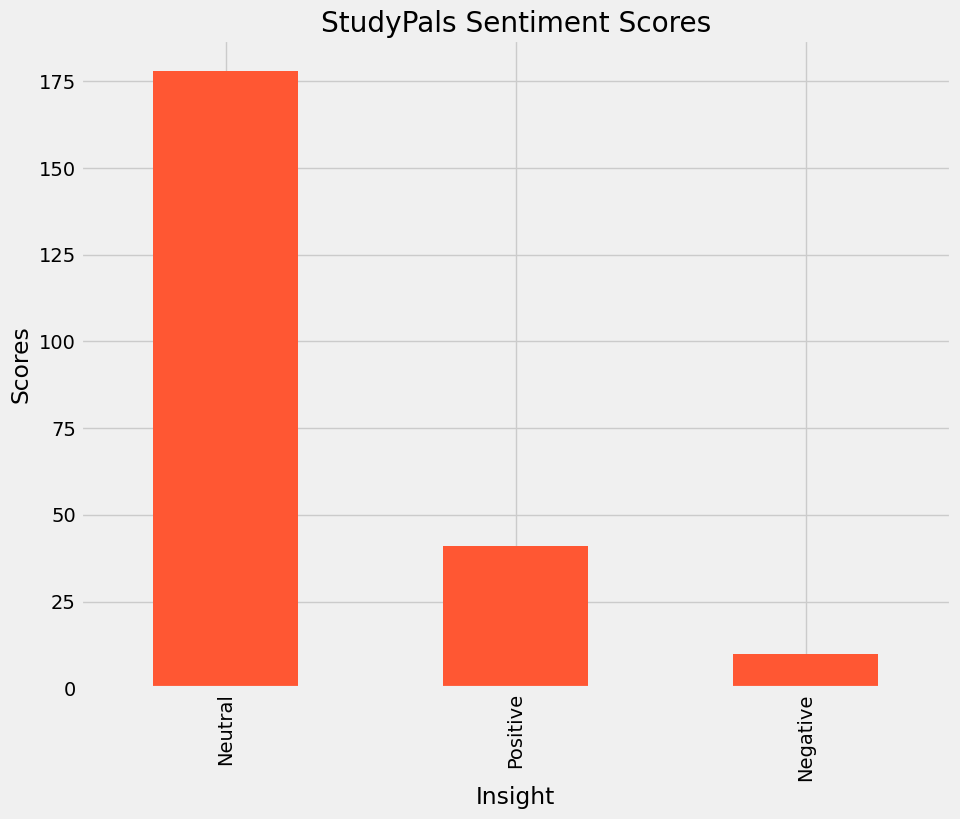

In [20]:
#Plot the values count of sentiment
# Plot the values count of sentiment
plt.title("StudyPals Sentiment Scores")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
StudyPals_df["Insight"].value_counts().plot(kind="bar", color="#FF5733")
plt.show()

**Generating Word Cloud from Concatenated Titles in StudyPals DataFrame**


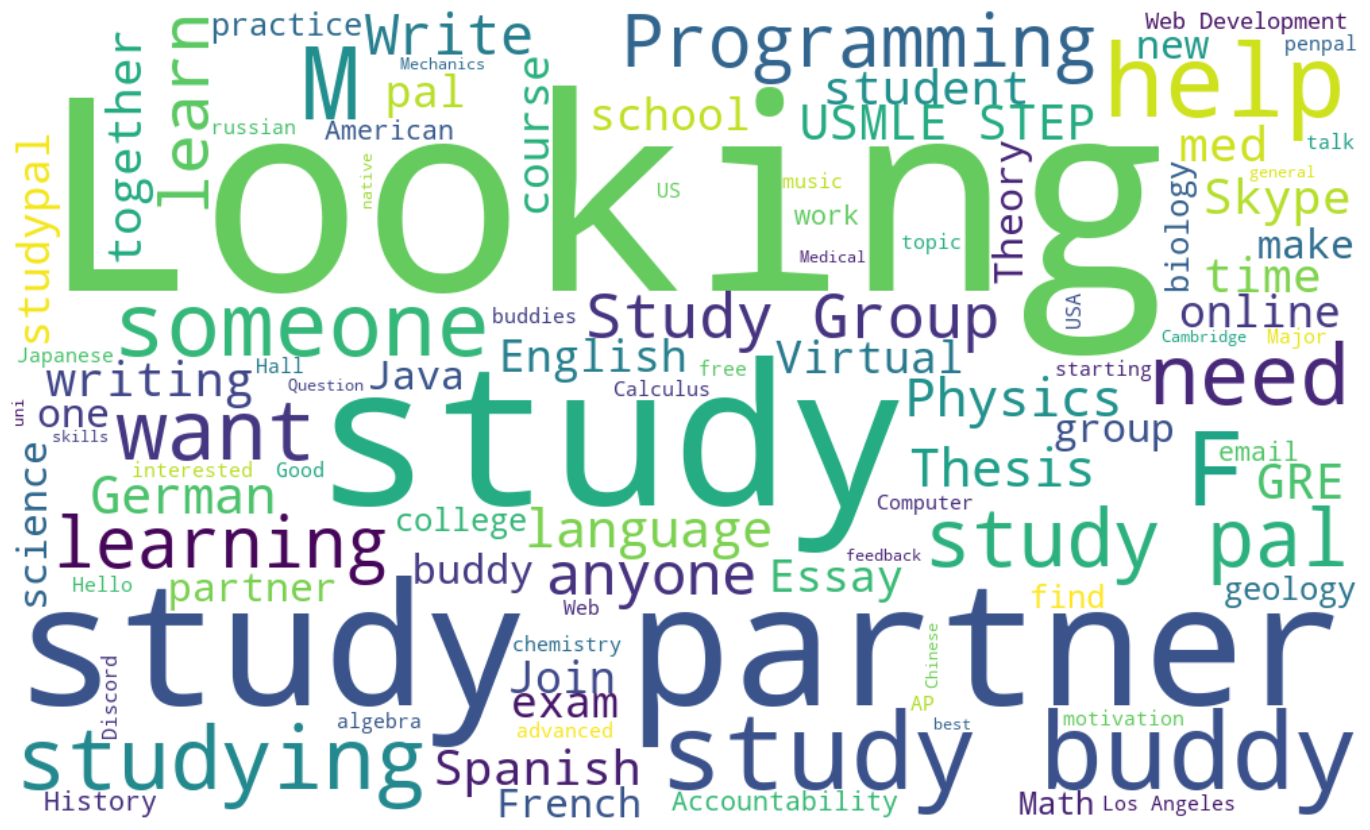

In [21]:
# Concatenate all titles into a single string
text = ' '.join([title for title in StudyPals_df['Titles']])

# Generate word cloud
wordcloud = WordCloud(width=1000, height=600,
                      max_words=100,
                      stopwords=STOPWORDS,
                      background_color="white").generate(text)

# Display the generated image
plt.figure(figsize=(20,10), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()